# Keras TF 2.0 - Classification Project

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## EDA

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

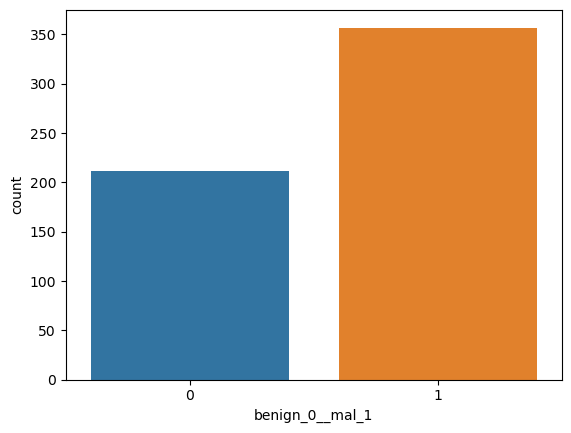

In [96]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

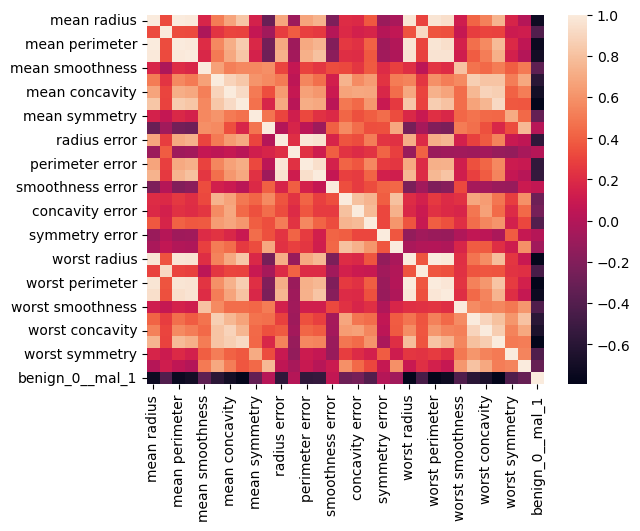

In [97]:
sns.heatmap(df.corr())

<Axes: >

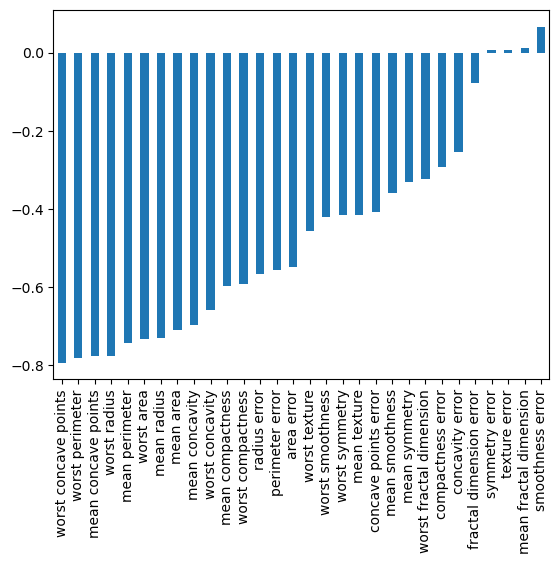

In [98]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
#pretty strong correlations so should get good predictions off this data set

## Train Test Split

In [99]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [102]:
from sklearn.preprocessing import MinMaxScaler
#for classification

In [103]:
scaler = MinMaxScaler()

In [104]:
scaler.fit(X_train)

MinMaxScaler()

In [105]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [107]:
X_train.shape

(426, 30)

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [109]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [110]:
from tensorflow.keras.layers import Dropout

In [111]:
model = Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [112]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6994 - val_loss: 0.6753
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6727 - val_loss: 0.6613
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6582 - val_loss: 0.6423
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6482 - val_loss: 0.6218
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6112 - val_loss: 0.6006
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6316 - val_loss: 0.5788
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5834 - val_loss: 0.5550
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5684 - val_loss: 0.5299
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5469 - val_loss: 0.5012
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5391 - val_loss: 0.4720
Epoch 

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1202 - val_loss: 0.0971
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1124 - val_loss: 0.1000
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1310 - val_loss: 0.1138
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1145 - val_loss: 0.0924
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1153 - val_loss: 0.1147
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1109 - val_loss: 0.0914
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1054 - val_loss: 0.0963
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 0.0992
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 0.0942
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.0944


<Axes: >

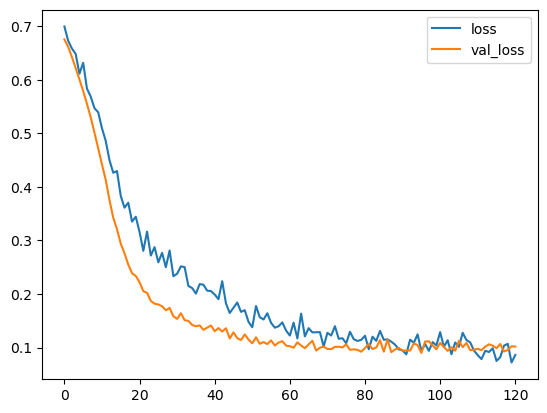

In [113]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [114]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [117]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
